# Neural Networks
This notebook runs multiple different neural networks.

<br><br><br><br>
# Libaries & Global variables

## Libaries

In [1]:
# General libaries
import pandas as pd
import numpy as np
import os
import pickle

# Neural network related
import keras
from keras import models
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras import layers
from keras.preprocessing.image import ImageDataGenerator # To create an image generator to create batches of images
from keras.preprocessing import image # To change images to an np array AND visualize the image
from keras import optimizers # to optimize

# Visualizing
import matplotlib.pyplot as plt

# To clear ram
from tensorflow.keras import backend as K
K.clear_session()

# To get information about ram
import multiprocessing

pd.set_option('max_colwidth', None)
pd.set_option("display.max_rows", 100)

Using TensorFlow backend.


## Global variables

In [2]:
dataset_path = os.path.join(os.getcwd(), 'datasets', 'UTKface-new-structure')

In [3]:
training_path   = os.path.join(os.getcwd(), 'datasets', 'UTKface-new-structure', 'training')
validation_path = os.path.join(os.getcwd(), 'datasets', 'UTKface-new-structure', 'validation')
test_path       = os.path.join(os.getcwd(), 'datasets', 'UTKface-new-structure', 'test')

<br><br><br><br>
# General functions

In [4]:
def load_dataset():
    """
    This function loads the dataset.
    """
    with open('df.pkl', 'rb') as input_file:
        df = pickle.load(input_file)
        
    return df


def save_history_model(history, filename, storage_location):
    """
    This function pickles the history of a model and stores it
    at the storage_location with the given filename.
    """
    
    # Pickle the result
    location = os.path.join(storage_location, filename + '.pkl')
    
    with open(location, 'wb') as output_file:
        pickle.dump(history, output_file)
        
def plot_history(history, x_as, y_as, title, line1='accuracy', line2='val_accuracy'):
    """
    This function plots two lines, which as default are accuracy
    and val_accuracy.
    """
    
    history = history.history
    
    plt.plot(range(1, len(history[line1]) + 1), history[line1])
    plt.plot(range(1, len(history[line2]) + 1), history[line2])
    plt.xlabel(x_as)
    plt.ylabel(y_as)
    plt.title(title)
    plt.legend([line1, line2])
    plt.show()

In [5]:
df = load_dataset()
df.head()

,age,age-binned,gender,race,datetime,category,path
4,10,"(0, 10]",0,0,20161220222308131,training,C:\Users\Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface-new-structure\training\10
5,10,"(0, 10]",0,0,20170103200329407,training,C:\Users\Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface-new-structure\training\10
6,10,"(0, 10]",0,0,20170103200522151,training,C:\Users\Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface-new-structure\training\10
7,10,"(0, 10]",0,0,20170103233459275,validation,C:\Users\Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface-new-structure\validation\10
8,10,"(0, 10]",0,0,20170104013211746,training,C:\Users\Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface-new-structure\training\10


<br><br><br><br><br><br><br><br>
# Neural Network 1.0 - LeNet-5 CNN Architecture
* Sithungu, S., & Van der Haar, D. (2019). Real-Time Age Detection Using a Convolutional Neural Network. *Business Information Systems*, 245–256. https://doi.org/10.1007/978-3-030-20482-2_20
* Information of LeNet-5 CNN architecture https://engmrk.com/lenet-5-a-classic-cnn-architecture/


<br>

The LeNet-5 structure consists of:
* Layer 1 - Input: 32x32 grayscale image with 6 feature maps of size 5x5 and stride 1.
* Layer 2 - Average pooling with filter size 2x2 and stride 2.
* Layer 3 - Conv layer with 16 feature maps of size 5x5 and stride 1.
* Layer 4 - Average pooling with filter size 2x2 and stride 2.
* Layer 5 - Fully connected layer with 120 units/feature maps of size 1x1.
* Layer 6 - Fully connected layer with 84 units.

<br>

Result:
* Loss went to nan pretty early.

<br><br>
## Functions

In [19]:
def build_dense_model():
    """
    This function creates a simple sequential neural network.
    """
    # Sequential model
    model = models.Sequential() 
    
    # Hidden layers
    model.add(layers.Conv2D(filters     = 6, 
                            kernel_size = (3,3), 
                            activation  = 'relu', 
                            input_shape = (32, 32, 1)))
    model.add(layers.AveragePooling2D(pool_size = (2,2), 
                                      strides   = 1))
    
    model.add(layers.Conv2D(filters     = 16, 
                            kernel_size = (3,3), 
                            activation  = 'relu'))
    model.add(layers.AveragePooling2D(pool_size = (2,2), 
                                      strides   = 1))    
    
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(units = 120, 
                           activation='relu'))
    model.add(layers.Dense(units = 84, 
                           activation='relu'))
    
    # Output layer
    model.add(layers.Dense(units = 7, 
                           activation='relu'))
    
    # Compiler
    model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])      
        
    return model

model = build_dense_model()
model.name='neural-network-1.0-LeNet-5-CNN-Architecture'
model.summary()

Model: "neural-network-1.0-LeNet-5-CNN-Architecture"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_3 (Average (None, 29, 29, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 16)        880       
_________________________________________________________________
average_pooling2d_4 (Average (None, 26, 26, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               1298040   
_________________________________________________________________
dense_5 (Dense)        

<br><br>
## Generator

In [14]:
# Define image generators objects
train_datagen      = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen       = ImageDataGenerator(rescale=1./255)

# Create image generators
TARGET_SIZE = (32, 32)
COLOR_MODE  = 'grayscale'
BATCH_SIZE  = 32

train_generator    = train_datagen.flow_from_directory(directory   = training_path,
                                                       target_size = TARGET_SIZE,
                                                       color_mode  = COLOR_MODE,
                                                       batch_size  = BATCH_SIZE)

validation_datagen = train_datagen.flow_from_directory(directory   = validation_path,
                                                       target_size = TARGET_SIZE,
                                                       color_mode  = COLOR_MODE,
                                                       batch_size  = BATCH_SIZE)

test_generator     = test_datagen.flow_from_directory(directory    = test_path,
                                                      target_size  = TARGET_SIZE,
                                                      color_mode   = COLOR_MODE,
                                                      batch_size   = BATCH_SIZE)

Found 15982 images belonging to 7 classes.
Found 4514 images belonging to 7 classes.
Found 2341 images belonging to 7 classes.


<br><br><br>
## Run the model

In [15]:
K.clear_session()

model = build_dense_model()
model.name='neural-network-1.0-LeNet-5-CNN-Architecture'
model.summary()

Model: "neural-network-1.0-LeNet-5-CNN-Architecture"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_1 (Average (None, 29, 29, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        880       
_________________________________________________________________
average_pooling2d_2 (Average (None, 26, 26, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               1298040   
_________________________________________________________________
dense_2 (Dense)        

In [16]:
history = model.fit_generator(generator           = train_generator,
                              steps_per_epoch     = train_generator.n // train_generator.batch_size,
                              epochs              = 15,
                              validation_data     = validation_datagen,
                              validation_steps    = validation_datagen.n // validation_datagen.batch_size,
                              verbose             = 1,
                              workers             = (multiprocessing.cpu_count()),
                              use_multiprocessing = False  # Not sure why it should be false, gives an error when true.
                             )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/15
499/499 [==============================] - 51s 102ms/step - loss: 4.3036 - accuracy: 0.3615 - val_loss: 5.2222 - val_accuracy: 0.3728
Epoch 2/15
499/499 [==============================] - 50s 101ms/step - loss: 4.2200 - accuracy: 0.3908 - val_loss: 3.6973 - val_accuracy: 0.3782
Epoch 3/15
499/499 [==============================] - 51s 102ms/step - loss: 4.2290 - accuracy: 0.4006 - val_loss: 3.0949 - val_accuracy: 0.3782
Epoch 4/15
499/499 [==============================] - 50s 101ms/step - loss: 4.2156 - accuracy: 0.4002 - val_loss: 5.7837 - val_accuracy: 0.3882
Epoch 5/15
499/499 [==============================] - 50s 100ms/step - loss: 4.2161 - accuracy: 0.4049 - val_loss: 4.1939 - val_accuracy: 0.3864
Epoch 6/15
499/499 [==============================] - 51s 102ms/step - loss: 4.1939 - accuracy: 0.4076 - val_loss: 4.6920 - val_accuracy: 0.3788
Epoch 7/15
499/499 [================

<br><br><br>
## Save results and plot results

In [17]:
# Save results
model.save_weights('models-and-results/neural-network-1.0-lenet-5-weights.h5')
model.save('models-and-results/neural-network-1.0-lenet-5-model.h5')
save_history_model(history          = history,
                   filename         = 'neural-network-1.0-lenet-5-history', 
                   storage_location = 'models-and-results')

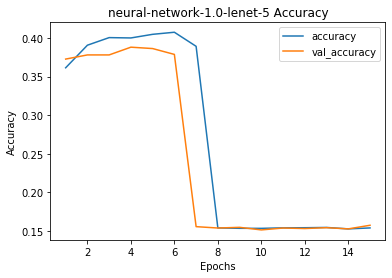

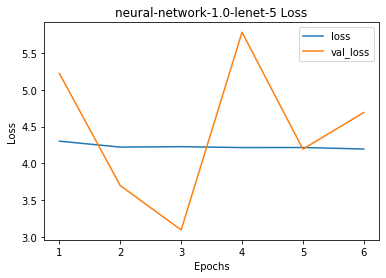

In [17]:
# Plot history
plot_history(history, line1='accuracy', line2='val_accuracy',
             x_as = 'Epochs', y_as = 'Accuracy', title = 'neural-network-1.0-lenet-5 Accuracy')

plot_history(history, line1='loss', line2='val_loss',
             x_as = 'Epochs', y_as = 'Loss', title = 'neural-network-1.0-lenet-5 Loss')

<br><br><br><br><br><br><br><br>
# Neural Network 1.1 - LeNet-5 CNN Architecture - BatchNormalization/Softmax
Modified the original LeNet-5 structure by:
* 1. Adding **two** BatchNormalization() layers **after** the Conv2D layers. 
* 2. Adding changing the output layers to an activation **softmax** instead of the **assumed** relu.

<br><br>
## Functions

In [21]:
def build_dense_model():
    """
    This function creates a simple sequential neural network.
    """
    # Sequential model
    model = models.Sequential() 
    
    # Hidden layers
    model.add(layers.Conv2D(filters     = 6, 
                            kernel_size = (3,3), 
                            activation  = 'relu', 
                            input_shape = (32, 32, 1)))
    model.add(layers.BatchNormalization())
    model.add(layers.AveragePooling2D(pool_size = (2,2), 
                                      strides   = 1))
    
    model.add(layers.Conv2D(filters     = 16, 
                            kernel_size = (3,3), 
                            activation  = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.AveragePooling2D(pool_size = (2,2), 
                                      strides   = 1))    
    
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(units = 120, 
                           activation='relu'))
    model.add(layers.Dense(units = 84, 
                           activation='relu'))
    
    # Output layer
    model.add(layers.Dense(units = 7, 
                           activation='softmax'))
    
    # Compiler
    model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])      
        
    return model

model = build_dense_model()
model.name='neural-network-1.1-LeNet-5-CNN-Architecture'
model.summary()

Model: "neural-network-1.1-LeNet-5-CNN-Architecture"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 6)         24        
_________________________________________________________________
average_pooling2d_7 (Average (None, 29, 29, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 27, 27, 16)        880       
_________________________________________________________________
batch_normalization_4 (Batch (None, 27, 27, 16)        64        
_________________________________________________________________
average_pooling2d_8 (Average (None, 26, 26, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)    

<br><br>
## Generator

In [22]:
# Define image generators objects
train_datagen      = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen       = ImageDataGenerator(rescale=1./255)

# Create image generators
TARGET_SIZE = (32, 32)
COLOR_MODE  = 'grayscale'
BATCH_SIZE  = 32

train_generator    = train_datagen.flow_from_directory(directory   = training_path,
                                                       target_size = TARGET_SIZE,
                                                       color_mode  = COLOR_MODE,
                                                       batch_size  = BATCH_SIZE)

validation_datagen = train_datagen.flow_from_directory(directory   = validation_path,
                                                       target_size = TARGET_SIZE,
                                                       color_mode  = COLOR_MODE,
                                                       batch_size  = BATCH_SIZE)

test_generator     = test_datagen.flow_from_directory(directory    = test_path,
                                                      target_size  = TARGET_SIZE,
                                                      color_mode   = COLOR_MODE,
                                                      batch_size   = BATCH_SIZE)

Found 15982 images belonging to 7 classes.
Found 4514 images belonging to 7 classes.
Found 2341 images belonging to 7 classes.


<br><br><br>
## Run the model

In [23]:
K.clear_session()

model = build_dense_model()
model.name='neural-network-1.1-LeNet-5-CNN-Architecture'
model.summary()

Model: "neural-network-1.1-LeNet-5-CNN-Architecture"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 6)         24        
_________________________________________________________________
average_pooling2d_1 (Average (None, 29, 29, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        880       
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 16)        64        
_________________________________________________________________
average_pooling2d_2 (Average (None, 26, 26, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)    

In [24]:
history = model.fit_generator(generator           = train_generator,
                              steps_per_epoch     = train_generator.n // train_generator.batch_size,
                              epochs              = 15,
                              validation_data     = validation_datagen,
                              validation_steps    = validation_datagen.n // validation_datagen.batch_size,
                              verbose             = 1,
                              workers             = (multiprocessing.cpu_count()),
                              use_multiprocessing = False  # Not sure why it should be false, gives an error when true.
                             )

Epoch 1/15
499/499 [==============================] - 74s 147ms/step - loss: 1.8007 - accuracy: 0.3559 - val_loss: 1.7355 - val_accuracy: 0.3420
Epoch 2/15
499/499 [==============================] - 72s 145ms/step - loss: 1.5229 - accuracy: 0.4262 - val_loss: 2.1539 - val_accuracy: 0.3920
Epoch 3/15
499/499 [==============================] - 68s 136ms/step - loss: 1.3114 - accuracy: 0.5001 - val_loss: 2.0746 - val_accuracy: 0.3800
Epoch 4/15
499/499 [==============================] - 66s 132ms/step - loss: 1.0491 - accuracy: 0.6043 - val_loss: 1.4958 - val_accuracy: 0.3757
Epoch 5/15
499/499 [==============================] - 67s 134ms/step - loss: 0.7916 - accuracy: 0.7088 - val_loss: 2.2571 - val_accuracy: 0.3503
Epoch 6/15
499/499 [==============================] - 67s 133ms/step - loss: 0.5720 - accuracy: 0.7972 - val_loss: 1.5757 - val_accuracy: 0.3278
Epoch 7/15
499/499 [==============================] - 68s 135ms/step - loss: 0.4152 - accuracy: 0.8536 - val_loss: 2.2115 - val_ac

<br><br><br>
## Save results and plot results

In [26]:
# Save results
model.save_weights('models-and-results/neural-network-1.1-lenet-5-weights.h5')
model.save('models-and-results/neural-network-1.1-lenet-5-model.h5')
save_history_model(history          = history,
                   filename         = 'neural-network-1.1-lenet-5-history', 
                   storage_location = 'models-and-results')

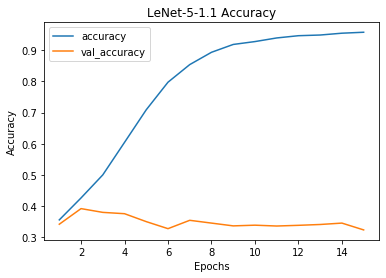

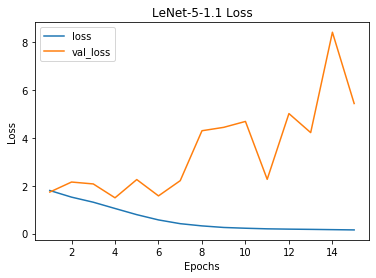

In [25]:
# Plot history
plot_history(history, line1='accuracy', line2='val_accuracy',
             x_as = 'Epochs', y_as = 'Accuracy', title = 'neural-network-1.1-lenet-5 Accuracy')

plot_history(history, line1='loss', line2='val_loss',
             x_as = 'Epochs', y_as = 'Loss', title = 'neural-network-1.1-lenet-5 Loss')

------

<br><br><br><br>
# Neural Network 2.0 - LeNet-5 CNN (proposed improved version)

<br><br>
## Functions

In [6]:
def build_model():
    """
    This function creates a simple sequential neural network.
    """
    # Sequential model
    model = models.Sequential() 
    
    # Hidden layers
    model.add(layers.Conv2D(filters     = 6, 
                            kernel_size = (7, 7),        # Fiters from (3, 3) to (7, 7)
                            activation  = 'relu', 
                            input_shape = (200, 200, 3)))
    model.add(layers.MaxPooling2D(pool_size = (2,2), 
                                      strides   = 2))     # Assumed based on trial and error, not mentioned in the paper
    
    model.add(layers.Conv2D(filters     = 16, 
                            kernel_size = (3,3), 
                            activation  = 'relu'))
    model.add(layers.MaxPooling2D(pool_size = (2,2), 
                                      strides   = 2))     # Assumed based on trial and error, not mentioned in the paper
    
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(units = 120, 
                           activation='relu'))
    model.add(layers.Dropout(rate = 0.5))                # Dropout layer added
    
    # Output layer
    model.add(layers.Dense(units = 7, 
                           activation='softmax'))        # Softmax instead of relu
    
    # Compiler
    model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])      
        
    return model

<br><br>
## Generator

In [7]:
# Define image generators objects
train_datagen      = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen       = ImageDataGenerator(rescale=1./255)

# Create image generators
TARGET_SIZE = (200, 200)
COLOR_MODE  = 'rgb'
BATCH_SIZE  = 32

train_generator    = train_datagen.flow_from_directory(directory   = training_path,
                                                       target_size = TARGET_SIZE,
                                                       color_mode  = COLOR_MODE,
                                                       batch_size  = BATCH_SIZE)

validation_datagen = train_datagen.flow_from_directory(directory   = validation_path,
                                                       target_size = TARGET_SIZE,
                                                       color_mode  = COLOR_MODE,
                                                       batch_size  = BATCH_SIZE)

test_generator     = test_datagen.flow_from_directory(directory    = test_path,
                                                      target_size  = TARGET_SIZE,
                                                      color_mode   = COLOR_MODE,
                                                      batch_size   = BATCH_SIZE)

Found 15990 images belonging to 7 classes.
Found 4584 images belonging to 7 classes.
Found 2263 images belonging to 7 classes.


<br><br><br>
## Run the model

In [8]:
K.clear_session()

model = build_model()
model.name='neural-network-2.0-LeNet-5-proposed-improved-CNN-Architecture'
model.summary()

Model: "neural-network-2.0-LeNet-5-proposed-improved-CNN-Architecture"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 194, 194, 6)       888       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 97, 97, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 95, 95, 16)        880       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 35344)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               4241400   
_________________________________________________________________
dropo

In [10]:
history = model.fit_generator(generator           = train_generator,
                              steps_per_epoch     = train_generator.n // train_generator.batch_size,
                              epochs              = 15,    # Paper stated that it converged after 20/100 epochs
                              validation_data     = validation_datagen,
                              validation_steps    = validation_datagen.n // validation_datagen.batch_size,
                              verbose             = 1,
                              workers             = multiprocessing.cpu_count(),
                              use_multiprocessing = False  # Not sure why it should be false, gives an error when true.
                             )

Epoch 1/15
499/499 [==============================] - 714s 1s/step - loss: 1.8007 - accuracy: 0.3425 - val_loss: 1.3917 - val_accuracy: 0.3748
Epoch 2/15
499/499 [==============================] - 707s 1s/step - loss: 1.6571 - accuracy: 0.3903 - val_loss: 1.7082 - val_accuracy: 0.4062
Epoch 3/15
499/499 [==============================] - 697s 1s/step - loss: 1.5894 - accuracy: 0.4106 - val_loss: 2.1242 - val_accuracy: 0.3992
Epoch 4/15
499/499 [==============================] - 711s 1s/step - loss: 1.5565 - accuracy: 0.4285 - val_loss: 1.4861 - val_accuracy: 0.4139
Epoch 5/15
499/499 [==============================] - 691s 1s/step - loss: 1.4667 - accuracy: 0.4522 - val_loss: 1.3906 - val_accuracy: 0.4225
Epoch 6/15
499/499 [==============================] - 691s 1s/step - loss: 1.4062 - accuracy: 0.4778 - val_loss: 1.5581 - val_accuracy: 0.4238
Epoch 7/15
499/499 [==============================] - 704s 1s/step - loss: 1.3342 - accuracy: 0.5061 - val_loss: 1.7403 - val_accuracy: 0.3954

<br><br><br>
## Save results and plot results

In [13]:
# Save results
model.save_weights('models-and-results/neural-network-2.0-lenet-5-proposed-model-weights.h5')
model.save('models-and-results/neural-network-2.0-lenet-5-proposed-model-model.h5')
save_history_model(history          = history,
                   filename         = 'neural-network-2.0-lenet-5-proposed-model-history', 
                   storage_location = 'models-and-results')

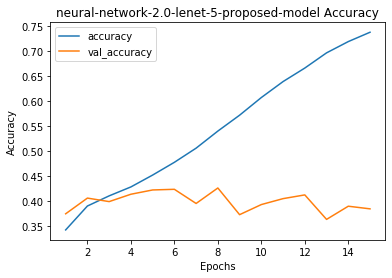

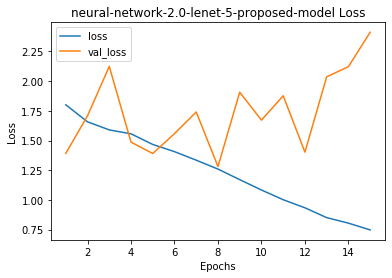

In [14]:
# Plot history
plot_history(history, line1='accuracy', line2='val_accuracy',
             x_as = 'Epochs', y_as = 'Accuracy', title = 'neural-network-2.0-lenet-5-proposed-model Accuracy')

plot_history(history, line1='loss', line2='val_loss',
             x_as = 'Epochs', y_as = 'Loss', title = 'neural-network-2.0-lenet-5-proposed-model Loss')

------

<br><br><br><br>
# Neural Network 3.0 - Transfer Learning - VG19